Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
data=pd.read_csv('Fraud_check (1).csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
#creating dummy variable for ['Undergrad','Marital.Status','Urban']
data=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [5]:
data.head(2)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1


In [6]:
#creating a for loop for #1002-30000 (consider Risky),30000-99620(consider Good)
m=[]
for i in data['Taxable.Income']:
    if i<= 30000:
        m.append("Risky")
    else:
        m.append('Good')

In [7]:
data['Type']=m

In [8]:
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Type
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [9]:
data['Type']=data['Type'].map({'Good':1,'Risky':0})

In [10]:
data.tail()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Type
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


amount of risky data and good data are  :
 True     476
False    124
Name: Type, dtype: int64


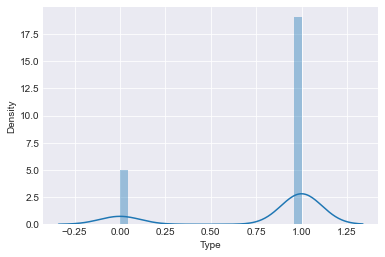

In [24]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
sns.distplot(data['Type'])
print('amount of risky data and good data are  :\n',(data['Type']==1).value_counts())

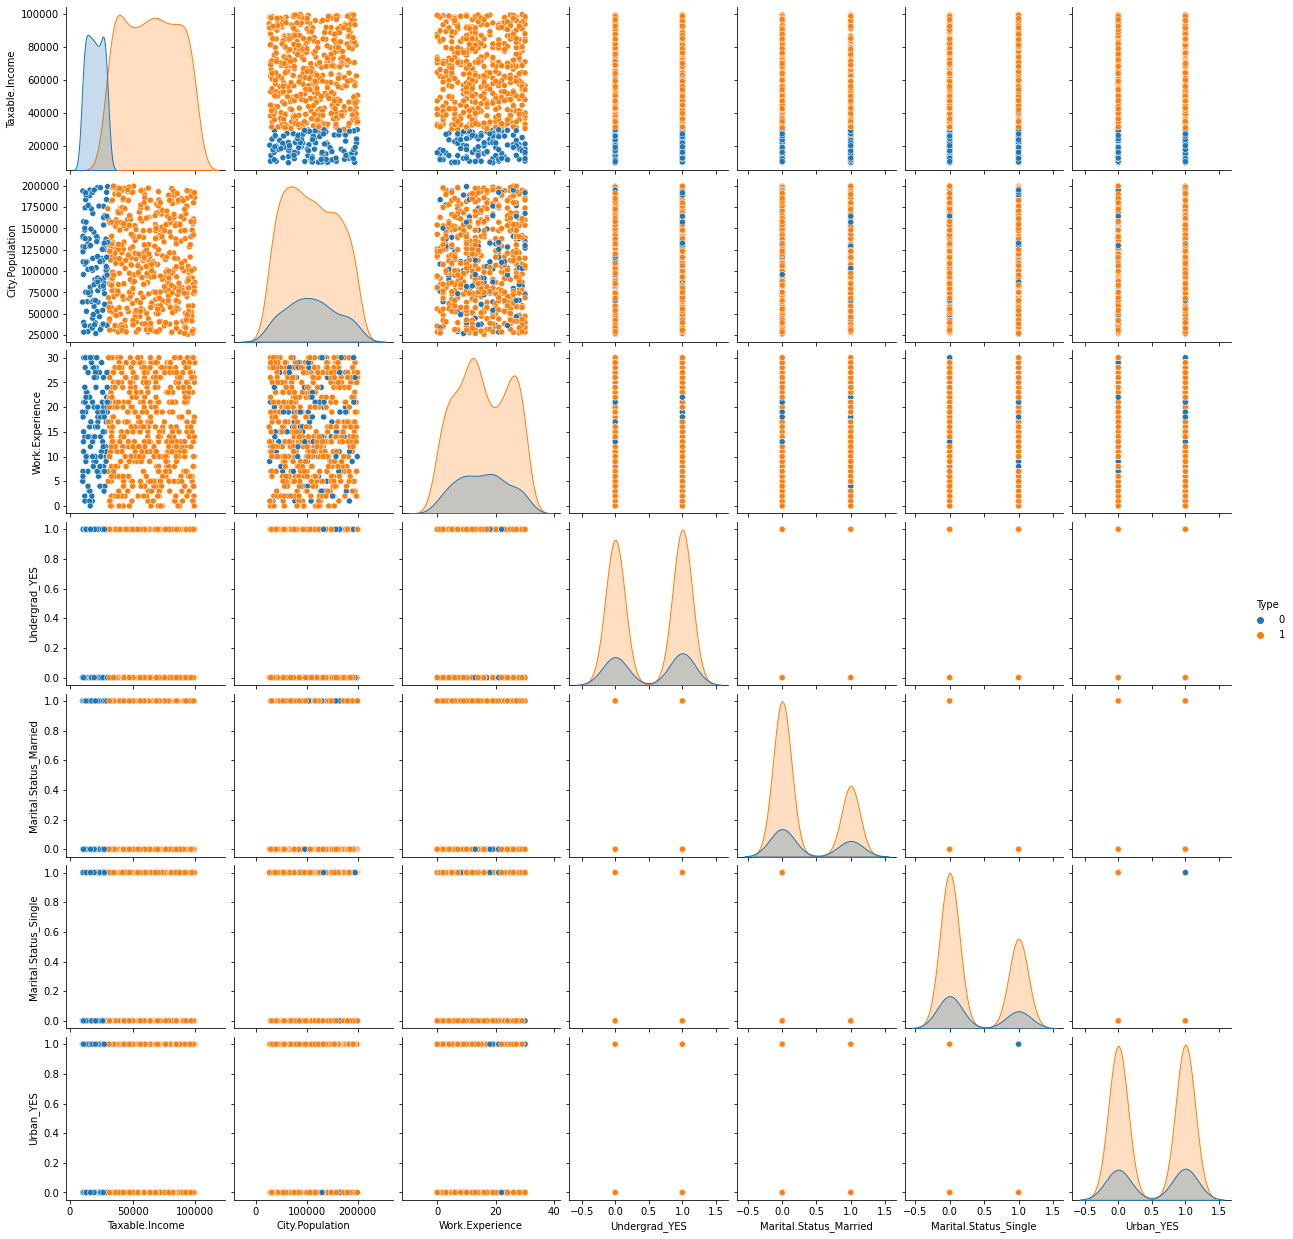

In [11]:
#visualizating the data and show the tax separately
sns.pairplot(data,hue='Type')

In [12]:
data.isnull().sum()

Taxable.Income            0
City.Population           0
Work.Experience           0
Undergrad_YES             0
Marital.Status_Married    0
Marital.Status_Single     0
Urban_YES                 0
Type                      0
dtype: int64

In [14]:
data[data.duplicated()]

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Type


In [19]:
pd.crosstab(data['Marital.Status_Married'] ,data.Type)

Type,0,1
Marital.Status_Married,,
0,79,327
1,45,149


<AxesSubplot:xlabel='Marital.Status_Married'>

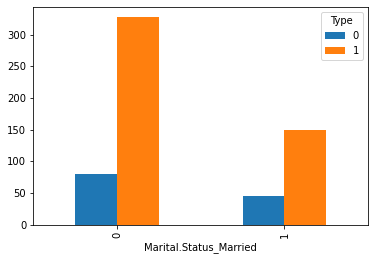

In [20]:
pd.crosstab(data['Marital.Status_Married'] ,data.Type).plot(kind='bar')

<AxesSubplot:xlabel='Marital.Status_Married', ylabel='Taxable.Income'>

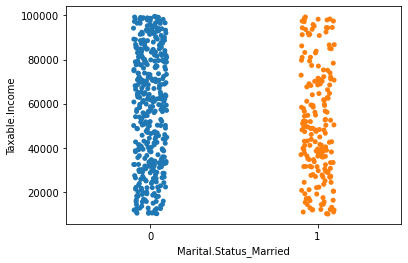

In [18]:
sns.stripplot(x='Marital.Status_Married',y='Taxable.Income',data=data,jitter=True)

<AxesSubplot:xlabel='Marital.Status_Single'>

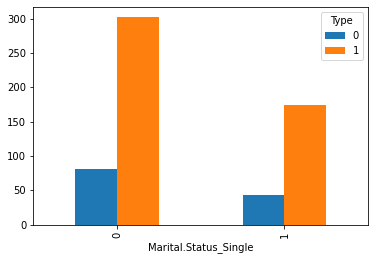

In [21]:
pd.crosstab(data['Marital.Status_Single'] ,data.Type).plot(kind='bar')

In [22]:
#Normalization function
#Data look not even so use normalization (larger values took most domination)
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [24]:
data_norm=norm(data.iloc[:,0:7])   #only the features

In [25]:
data_norm

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.656468,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.264428,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.300415,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.448436,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.792258,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
595,0.740236,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.669122,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.416566,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.988540,0.886810,0.566667,1.0,1.0,0.0,0.0


In [26]:
array=data_norm.values
x=array
y=data['Type']

In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Type, Length: 600, dtype: int64

In [29]:
data_norm.describe()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.504434,0.476832,0.518611,0.520000,0.323333,0.361667,0.503333
std,0.292412,0.286496,0.294738,0.500017,0.468139,0.480884,0.500406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255183,0.236713,0.266667,0.000000,0.000000,0.000000,0.000000
50%,0.502940,0.463879,0.500000,1.000000,0.000000,0.000000,1.000000
75%,0.765586,0.714575,0.800000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
data_norm.corr()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,-0.049232,-0.100611,0.037910,0.070628
City.Population,-0.064387,1.000000,0.013135,0.079579,-0.007035,0.002087,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,-0.005362,0.033347,-0.018123,-0.094559
Undergrad_YES,-0.049232,0.079579,-0.005362,1.000000,0.015120,0.028883,-0.000267
Marital.Status_Married,-0.100611,-0.007035,0.033347,0.015120,1.000000,-0.520317,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,0.028883,-0.520317,1.000000,0.047014
Urban_YES,0.070628,-0.040098,-0.094559,-0.000267,0.016771,0.047014,1.000000


# Model Building

In [31]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [35]:
kfold=KFold(n_splits=10)

In [33]:
# Let’s train a RandomForestClassifier on this dataset without using any hyperparameters
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [40]:
results=cross_val_score(model,xtrain,ytrain,cv=kfold)
results.mean()

0.9952380952380953

# Model Evaluation

In [43]:
from sklearn.metrics import accuracy_score
print('Training Accuracy : ',accuracy_score(ytrain,model.predict(xtrain))*100)
print('Testing Accuracy : ',accuracy_score(ytest,model.predict(xtest))*100)

Training Accuracy :  100.0
Testing Accuracy :  100.0


In [44]:
model.score(xtrain,ytrain)

1.0

In [46]:
#we achieving accuracy of traing and testing data are more equal to 100
#so model is not overlearning the trainig data
#No need for hyperparameter tuning or improve the data

Voting Classifier #checking the overall Accuracy of the data

In [54]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [56]:
kfold=KFold(n_splits=10)

#Create the submodels
estimators=[]
model1=LogisticRegression(max_iter=500)
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))

#create ensemble model
ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
results.mean()


0.9716666666666665